In [19]:
#匯入模組
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import collections

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, metrics
from sklearn.decomposition import PCA

In [20]:
#讀取資料
original_live_data = pd.read_csv('drive/My Drive/Yuntech109_1/DataMining/Homework03/Live.csv')

In [21]:
#檢視資料
original_live_data

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [22]:
live_data = original_live_data

In [23]:
#把時間欄位轉為時間格式，在後面就可以直接取「月份、日期、小時」
live_data['status_published'] = pd.to_datetime(live_data['status_published'])

In [24]:
# 新增月份、日期、小時
# 因為前面已經把欄位轉為時間格式，
# 所以這邊就可以用.dt的方式去拿時間的元素
live_data['year'] = live_data['status_published'].dt.year
live_data['month'] = live_data['status_published'].dt.month
live_data['date'] = live_data['status_published'].dt.day
live_data['hour'] = live_data['status_published'].dt.hour

In [25]:
#列出所有欄位
live_data.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [26]:
#刪除多餘欄位
live_data = live_data.drop(['status_id', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

In [27]:
#檢視資料
live_data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,date,hour
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016,9,24,2
7046,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016,9,23,11
7047,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016,9,21,23
7048,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016,9,20,0


In [28]:
#設定label正規化
labelencoder = LabelEncoder()

In [29]:
#將不是數值型態的轉為Label
live_data['status_type'] = labelencoder.fit_transform(live_data['status_type'])

In [30]:
#檢視資料
live_data

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,date,hour
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,21,22
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,21,6
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,21,2
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0,2016,9,24,2
7046,1,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0,2016,9,23,11
7047,1,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0,2016,9,21,23
7048,1,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0,2016,9,20,0


In [31]:
#列出所有欄位
live_data.columns

Index(['status_type', 'status_published', 'num_reactions', 'num_comments',
       'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas',
       'num_sads', 'num_angrys', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [32]:
#將x放入要分群的資料
x = live_data.drop(['status_published', 'year', 'month', 'date', 'hour'], axis=1)
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [33]:
#y為原始分群的結果
y = live_data['year']
y

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
7045    2016
7046    2016
7047    2016
7048    2016
7049    2016
Name: year, Length: 7050, dtype: int64

In [34]:
#Hierarchical分群
#查看分幾群會得到最佳的purity
ks = range(2, 21)
for k in ks:
    KKSTticks=time.clock()
    hclust = cluster.AgglomerativeClustering(linkage = 'average', affinity = 'euclidean', n_clusters = k)
    hclust.fit(x)
    cluster_labels = hclust.labels_
    
    #計算純度
    def purity(result,label):
        total_num = len(label)
        cluster_counter = collections.Counter(result)
        original_counter = collections.Counter(label)
        t=[]
        for k in cluster_counter:
            p_k = []
            for j in original_counter:
                 count = 0
                 for i in range(len(result)):
                     if result[i] == k and label[i] == j: # 求交集
                         count += 1
                 p_k.append(count)
            temp_t = max(p_k)
            t.append(temp_t)
        return sum(t)/total_num
    #計算每群的績效
    print('Hierarchical績效：',k,'群,')
    KKEDticks=time.clock()
    print('Hierarchical所花費時間：',KKEDticks-KKSTticks)
    print('Hierarchical純度：',purity(cluster_labels,y))

Hierarchical績效： 2 群,
Hierarchical所花費時間： 1.5508250000000032
Hierarchical純度： 0.36226950354609927
Hierarchical績效： 3 群,
Hierarchical所花費時間： 1.5640100000000103
Hierarchical純度： 0.3624113475177305
Hierarchical績效： 4 群,
Hierarchical所花費時間： 1.620638999999997
Hierarchical純度： 0.3624113475177305
Hierarchical績效： 5 群,
Hierarchical所花費時間： 1.514876000000001
Hierarchical純度： 0.365531914893617
Hierarchical績效： 6 群,
Hierarchical所花費時間： 1.5541300000000007
Hierarchical純度： 0.3656737588652482
Hierarchical績效： 7 群,
Hierarchical所花費時間： 1.5414169999999956
Hierarchical純度： 0.3656737588652482
Hierarchical績效： 8 群,
Hierarchical所花費時間： 1.5707909999999998
Hierarchical純度： 0.3656737588652482
Hierarchical績效： 9 群,
Hierarchical所花費時間： 1.5834310000000045
Hierarchical純度： 0.3727659574468085
Hierarchical績效： 10 群,
Hierarchical所花費時間： 1.5501689999999968
Hierarchical純度： 0.3729078014184397
Hierarchical績效： 11 群,
Hierarchical所花費時間： 1.5447709999999972
Hierarchical純度： 0.3730496453900709
Hierarchical績效： 12 群,
Hierarchical所花費時間： 1.5543169999999975


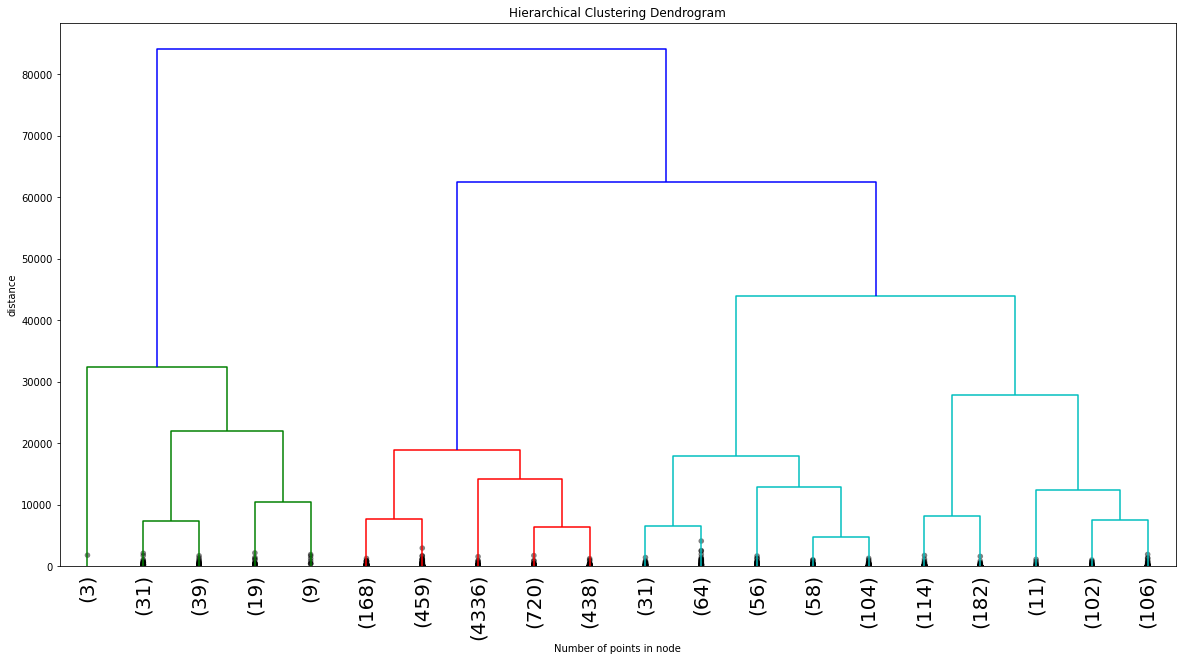

In [35]:
#繪圖 
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt
import numpy as np
X=x
Z = linkage(X, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20,10))
dn = dendrogram(Z,p=20, truncate_mode='lastp', leaf_rotation=90., leaf_font_size=20., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Number of points in node")
plt.ylabel("distance")
plt.show() 